In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
import os
from pandas.api.types import is_numeric_dtype

In [2]:
def get_lemonade():
    if os.path.isfile('lemonade.csv'):
        df = pd.read_csv('lemonade.csv')
        return df

In [3]:
df = get_lemonade()

In [4]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


**1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.**

In [5]:
def get_lower_and_upper_bounds(df, col, k):
    
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    iqr = q3 - q1
    lower_bound = q1 - (iqr * k)
    upper_bound = q3 + (iqr + k)
    return lower_bound, upper_bound
        

In [6]:
def get_bounds(df, k):
    my_fences = {}
    for col in df.columns:
        if is_numeric_dtype(df[col]) == True:
            my_fences[col] = get_lower_and_upper_bounds(df, col, k)
    return my_fences

#### 1. Using lemonade.csv dataset and focusing on continuous variables:

Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [7]:
df['Date'] = pd.to_datetime(df.Date)

In [8]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,2017-01-01,Sunday,27.0,2.00,15,0.5,10
1,2017-01-02,Monday,28.9,1.33,15,0.5,13
2,2017-01-03,Tuesday,34.5,1.33,27,0.5,15
3,2017-01-04,Wednesday,44.1,1.05,28,0.5,17
4,2017-01-05,Thursday,42.4,1.00,33,0.5,18


In [9]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


In [10]:
my_fences = get_bounds(df, k=1.5)
pd.DataFrame(my_fences).T

,0,1
Temperature,16.70,95.20
Rainfall,0.26,2.67
Flyers,4.00,68.50
Price,0.50,2.00
Sales,5.00,41.50


In [11]:
def get_lower_outliers(df, my_fences):

    for col in my_fences:

        print(f'For feature {col}')
        print(df[
        (df[col] < my_fences[col][0])])
        print('========================')

In [12]:
get_lower_outliers(df, my_fences)

For feature Temperature
          Date     Day  Temperature  Rainfall  Flyers  Price  Sales
364 2017-12-31  Sunday         15.1       2.5       9    0.5      7
For feature Rainfall
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
For feature Flyers
          Date      Day  Temperature  Rainfall  Flyers  Price  Sales
324 2017-11-21  Tuesday         47.0      0.95     -38    0.5     20
For feature Price
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
For feature Sales
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []


Keep the lower outliers for:

    - Temperature
    - Flyers (maybe not though because its so much lower than the lower bound)

Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

In [13]:
pd.DataFrame(my_fences).T

,0,1
Temperature,16.70,95.20
Rainfall,0.26,2.67
Flyers,4.00,68.50
Price,0.50,2.00
Sales,5.00,41.50


In [14]:
def get_upper_outliers(df, my_fences):

    for col in my_fences:

        print(f'For feature {col}')
        print(df[
        (df[col] > my_fences[col][1])])
        print('========================')

In [15]:
get_upper_outliers(df, my_fences)

For feature Temperature
          Date       Day  Temperature  Rainfall  Flyers  Price  Sales
41  2017-02-11  Saturday        212.0      0.91      35    0.5     21
166 2017-06-16    Friday         99.3      0.47      77    0.5     41
176 2017-06-26    Monday        102.6      0.47      60    0.5     42
181 2017-07-01  Saturday        102.9      0.47      59    0.5    143
190 2017-07-10    Monday         98.0      0.49      66    0.5     40
198 2017-07-18   Tuesday         99.3      0.47      76    0.5     41
202 2017-07-22  Saturday         99.6      0.47      49    0.5     42
207 2017-07-27  Thursday         97.9      0.47      74    0.5     43
For feature Rainfall
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
For feature Flyers
          Date        Day  Temperature  Rainfall  Flyers  Price  Sales
166 2017-06-16     Friday         99.3      0.47      77    0.5     41
170 2017-06-20    Tuesday         85.1      0.54      70    0.5     37
1

Keep the upper outliers for:
    
    - Temperature: all but 212, way high
    - Flyers
    - Sales: keep all lower than 143

Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

In [16]:
my_fences = get_bounds(df, 3)

In [17]:
pd.DataFrame(my_fences).T

,0,1
Temperature,-16.30,96.70
Rainfall,-0.13,4.17
Flyers,-23.00,70.00
Price,0.50,3.50
Sales,-10.00,43.00


In [19]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


In [18]:
get_lower_outliers(df, my_fences)

For feature Temperature
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
For feature Rainfall
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
For feature Flyers
          Date      Day  Temperature  Rainfall  Flyers  Price  Sales
324 2017-11-21  Tuesday         47.0      0.95     -38    0.5     20
For feature Price
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
For feature Sales
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []


With a k value of 3, if the value of -23 would be kept, then -38 may as well be kept in the df as well.

Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [20]:
get_upper_outliers(df, my_fences)

For feature Temperature
          Date       Day  Temperature  Rainfall  Flyers  Price  Sales
41  2017-02-11  Saturday        212.0      0.91      35    0.5     21
166 2017-06-16    Friday         99.3      0.47      77    0.5     41
176 2017-06-26    Monday        102.6      0.47      60    0.5     42
181 2017-07-01  Saturday        102.9      0.47      59    0.5    143
190 2017-07-10    Monday         98.0      0.49      66    0.5     40
198 2017-07-18   Tuesday         99.3      0.47      76    0.5     41
202 2017-07-22  Saturday         99.6      0.47      49    0.5     42
207 2017-07-27  Thursday         97.9      0.47      74    0.5     43
For feature Rainfall
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
For feature Flyers
          Date        Day  Temperature  Rainfall  Flyers  Price  Sales
166 2017-06-16     Friday         99.3      0.47      77    0.5     41
171 2017-06-21  Wednesday         94.3      0.47      76    0.5     41
1

In [21]:
pd.DataFrame(my_fences).T

,0,1
Temperature,-16.30,96.70
Rainfall,-0.13,4.17
Flyers,-23.00,70.00
Price,0.50,3.50
Sales,-10.00,43.00


In [22]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


For temperature, I may keep all rows except row 41; 212 degrees is a bit over 96.70

For flyers, with an upper fence of 70, I would keep all of these rows as well

For sales, all these values are far higher than the upper bound; I would drop all of these

**2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:
Use a 2 sigma decision rule to isolate the outliers.**

    - Do these make sense?

    - Should certain outliers be kept or removed?

In [26]:
num_cols = []
for col in df.columns:
    if is_numeric_dtype(df[col]) == True:
        num_cols.append(col)

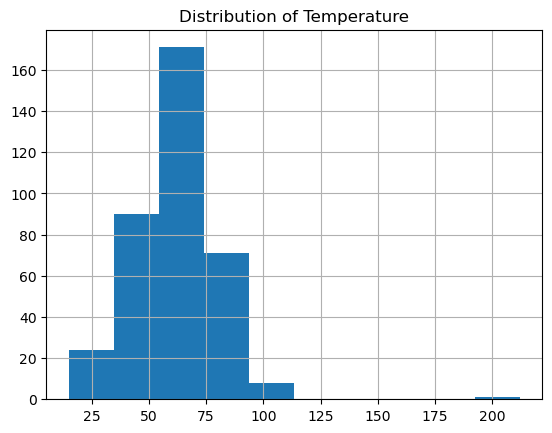

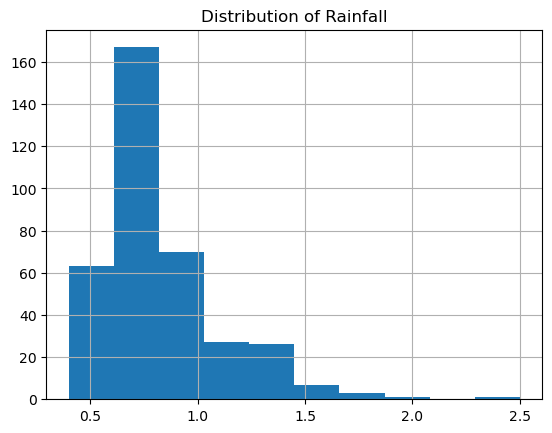

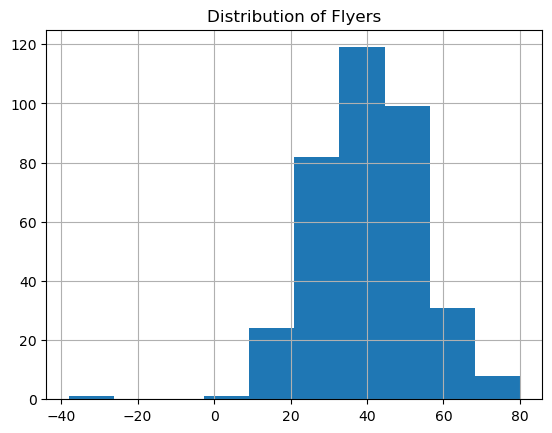

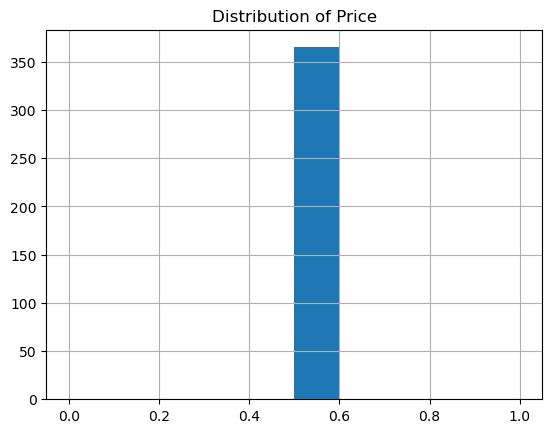

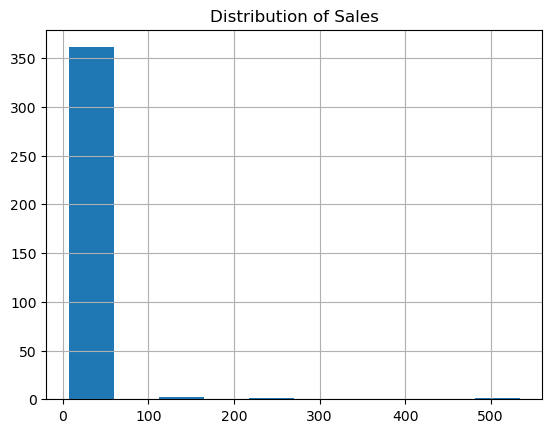

In [33]:
for col in num_cols:
    df[col].hist()
    plt.title(f'Distribution of {col}')
    plt.show()

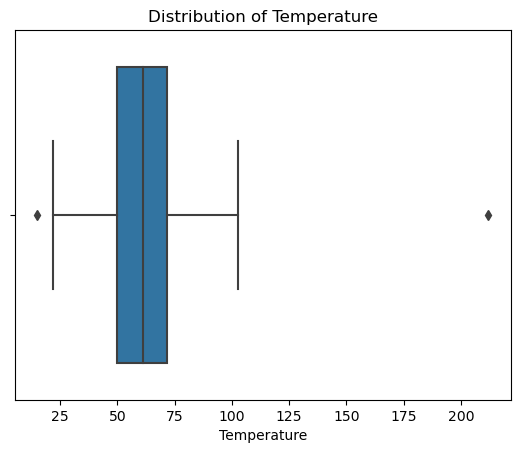

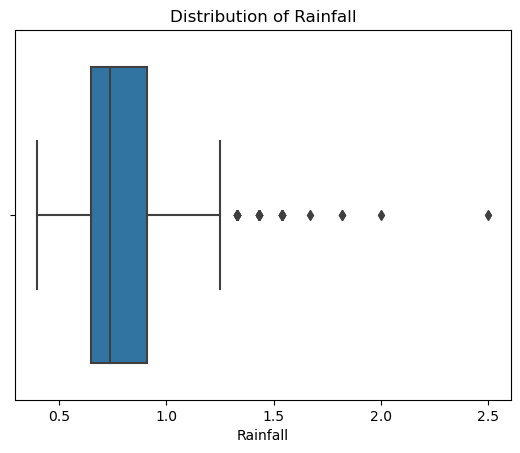

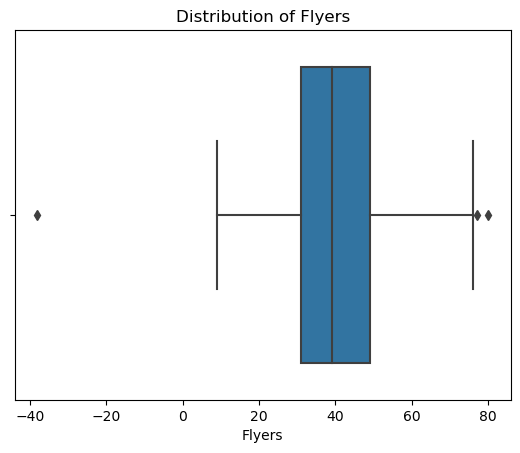

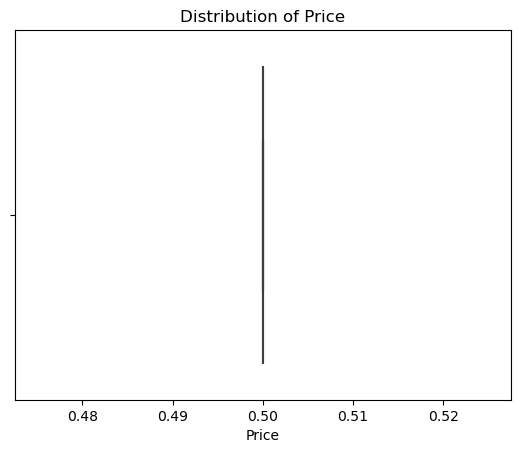

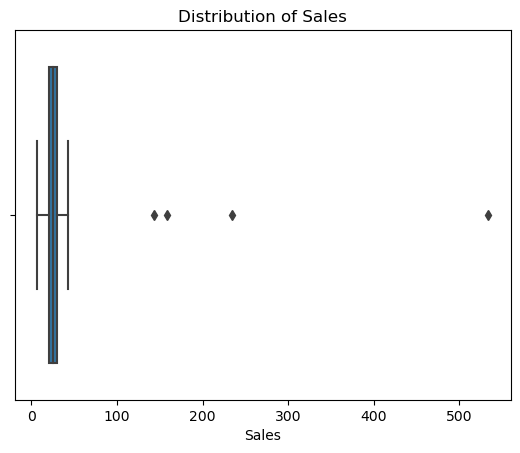

In [34]:
for col in num_cols:
    sns.boxplot(data=df, x=df[col])
    plt.title(f'Distribution of {col}')
    plt.show()

In [ ]:
# Normally Distributed columns:  Temperature, Flyers, Rainfall

In [36]:
df.columns = [col.lower().replace('.','_') for col in df.columns]

Index(['date', 'day', 'temperature', 'rainfall', 'flyers', 'price', 'sales'], dtype='object')

In [38]:
norm_cols = ['temperature', 'flyers', 'rainfall']

In [44]:
df['rainfall'].std()

0.27389026701985425

In [46]:
for col in norm_cols:
    print(f' For Column {col}')
    print(df[(((
    df[col] - df[col].mean()
)/ df[col].std()) > 2) | (((
    df[col] - df[col].mean()
)/ df[col].std()) < -2)].T)
    print('=============')

 For Column temperature
                             41                   166                  176  \
date         2017-02-11 00:00:00  2017-06-16 00:00:00  2017-06-26 00:00:00   
day                     Saturday               Friday               Monday   
temperature                212.0                 99.3                102.6   
rainfall                    0.91                 0.47                 0.47   
flyers                        35                   77                   60   
price                        0.5                  0.5                  0.5   
sales                         21                   41                   42   

                             181                  190                  198  \
date         2017-07-01 00:00:00  2017-07-10 00:00:00  2017-07-18 00:00:00   
day                     Saturday               Monday              Tuesday   
temperature                102.9                 98.0                 99.3   
rainfall                    0.47       

**3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv**

In [47]:
for col in norm_cols:
    print(f' For Column {col}')
    print(df[(((
    df[col] - df[col].mean()
)/ df[col].std()) > 3) | (((
    df[col] - df[col].mean()
)/ df[col].std()) < -3)].T)
    print('=============')

 For Column temperature
                              41
date         2017-02-11 00:00:00
day                     Saturday
temperature                212.0
rainfall                    0.91
flyers                        35
price                        0.5
sales                         21
 For Column flyers
                             324
date         2017-11-21 00:00:00
day                      Tuesday
temperature                 47.0
rainfall                    0.95
flyers                       -38
price                        0.5
sales                         20
 For Column rainfall
                             0                    15                   338  \
date         2017-01-01 00:00:00  2017-01-16 00:00:00  2017-12-05 00:00:00   
day                       Sunday               Monday              Tuesday   
temperature                 27.0                 30.6                 22.0   
rainfall                     2.0                 1.67                 1.82   
flyers            